<a href="https://colab.research.google.com/github/kn201dvv/dataAnalysys_CourseWork/blob/main/Visual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import datetime
%matplotlib inline
from google.colab import files
uploaded = files.upload()
vgs = pd.read_csv(io.StringIO(uploaded['vgsales.csv'].decode('utf-8')))

# Виведення загальної інформації про набір даних
vgs.info()

Saving vgsales.csv to vgsales.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Перевірка на наявність пропущених значень
print(vgs.isnull().sum())

# Перевірка наявності дублікатів
print("Dublicated:")
print(vgs.duplicated().sum())

# Перевірка статистичних показників для числових стовпців
print(vgs.describe())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Dublicated:
0
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count

In [ ]:
# Заміна пропущених значень у стовпці "Year" на середнє значення
mean_year = vgs['Year'].mean()
vgs['Year'].fillna(mean_year, inplace=True)

# Видалення рядків з пропущеними значеннями у стовпці "Publisher"
vgs.dropna(subset=['Publisher'], inplace=True)

# Перевірка на наявність пропущених значень після заміни та видалення
print(vgs.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


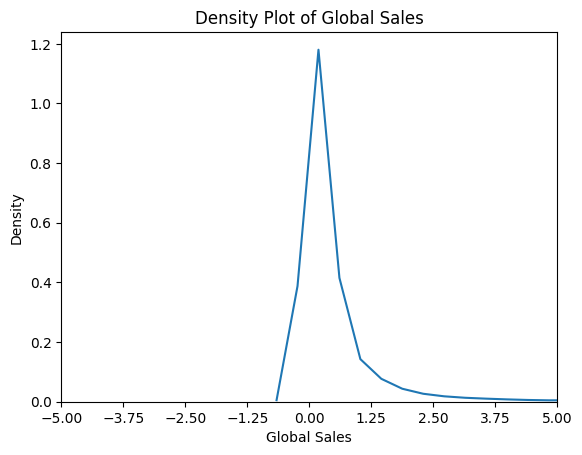

In [ ]:
sns.kdeplot(vgs['Global_Sales'])
#KDE(x) = (1/n) * ∑(K((x - xi) / h))

plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.title('Density Plot of Global Sales')

# Встановлення меж осі x
plt.xlim(-5, 5)

# Розподілення позначок рівномірно
ticks = np.linspace(-5, 5, 9)
plt.xticks(ticks)

plt.show()


In [ ]:
data = vgs['Global_Sales']

Q1 = np.percentile(data, 25)  # Обчислюємо перший квартиль (25%)
Q3 = np.percentile(data, 75)  # Обчислюємо третій квартиль (75%)
IQR = Q3 - Q1  # Обчислюємо міжквартильний розмах (IQR)

lower_bound = Q1 - 1.5 * IQR  # Обчислюємо нижню межу для виявлення викидів
upper_bound = Q3 + 1.5 * IQR  # Обчислюємо верхню межу для виявлення викидів

outliers = data[(data < lower_bound) | (data > upper_bound)]  # Вибираємо значення, які виходять за межі

print("Outliers:")
print(outliers)


Outliers:
0       82.74
1       40.24
2       35.82
3       33.00
4       31.37
        ...  
1888     1.09
1889     1.09
1890     1.09
1891     1.09
1892     1.09
Name: Global_Sales, Length: 1893, dtype: float64


In [ ]:
median_sales = vgs['Global_Sales'].median()
mean_sales = vgs['Global_Sales'].mean()

print("Median Global Sales:", median_sales)
print("Mean Global Sales:", mean_sales)


Median Global Sales: 0.17
Mean Global Sales: 0.5374406555006628


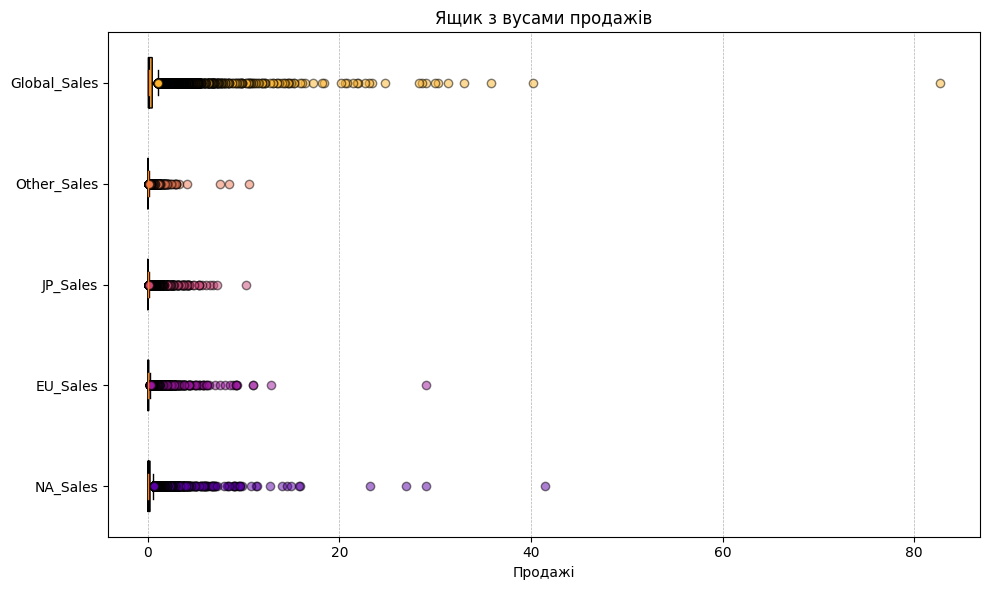

In [ ]:
from matplotlib import pyplot as plt

# Визначаємо стовпці, які містять дані про продажі
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Створюємо фігуру та вісі
fig, ax = plt.subplots(figsize=(10, 6))

# Створюємо "ящик з вусами" із використанням boxplot
bp = ax.boxplot(vgs[sales_columns], patch_artist=True, notch=True, vert=False, showfliers=True)

# Встановлюємо кольори для кожного "ящика" в залежності від стовпця продажів
colors = [plt.cm.plasma(i / len(sales_columns)) for i in range(len(sales_columns))]
for patch, color in zip(bp['boxes'], colors):
    patch.set(facecolor=color)

# Встановлюємо кольори для викидів в залежності від стовпця продажів
outlier_colors = [plt.cm.plasma((i+1) / (len(sales_columns)+1)) for i in range(len(sales_columns))]
for i, flier in enumerate(bp['fliers']):
    flier.set(markerfacecolor=outlier_colors[i], marker='o', alpha=0.5)

# Встановлюємо мітки для осі Y
ax.set_yticklabels(sales_columns)

# Встановлюємо підпис для осі X та заголовок графіку
ax.set_xlabel('Продажі')
ax.set_title('Ящик з вусами продажів')

# Додаємо сітку на графіку
ax.grid(axis='x', linestyle='--', linewidth=0.5)

# Відображаємо графік
plt.tight_layout()
plt.show()


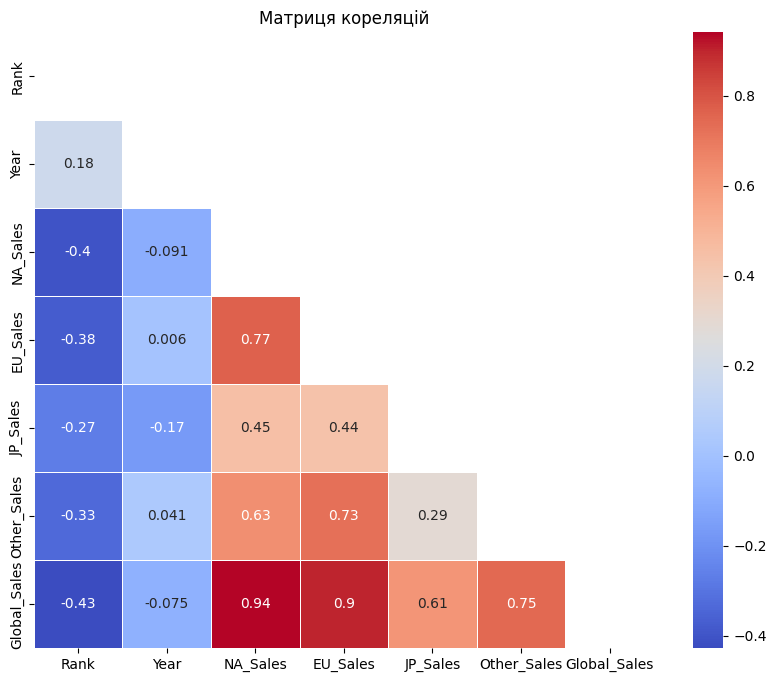


                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000  


In [ ]:
# Обчислюємо кореляційну матрицю
correlation_matrix = vgs.corr(numeric_only=True)

# Створюємо маску для скриття верхньої трикутної частини матриці
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Налаштовуємо розміри та властивості графіку
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Матриця кореляцій')

# Відображаємо графік
plt.show()

# Виводимо кореляційну матрицю
print('')
print(correlation_matrix)


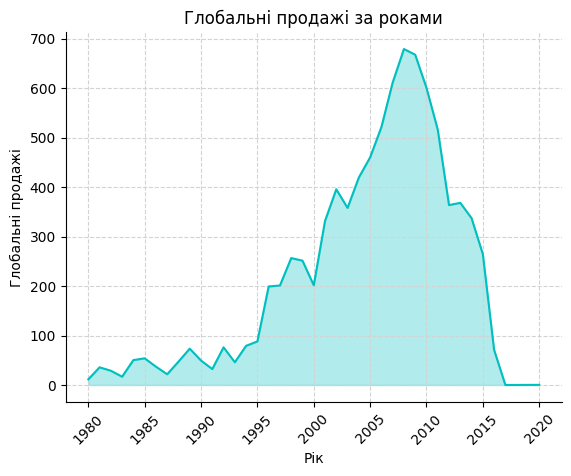

In [ ]:
import matplotlib.pyplot as plt

# Обчислення сумарних глобальних продажів за роками
sales_by_year = vgs.groupby('Year')['Global_Sales'].sum()

# Побудова графіку з лінією
plt.plot(sales_by_year.index, sales_by_year.values, linestyle='-', color='c')

# Заповнення простору під лінією
plt.fill_between(sales_by_year.index, sales_by_year.values, color='c', alpha=0.3)

# Підписи осей та заголовок графіку
plt.xlabel('Рік')
plt.ylabel('Глобальні продажі')
plt.title('Глобальні продажі за роками')

# Приховування верхньої та правої границь графіку
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Сітка графіку
plt.grid(color='lightgray', linestyle='--')

# Обертання підписів осей x
plt.xticks(rotation=45)

# Відображення графіку
plt.show()



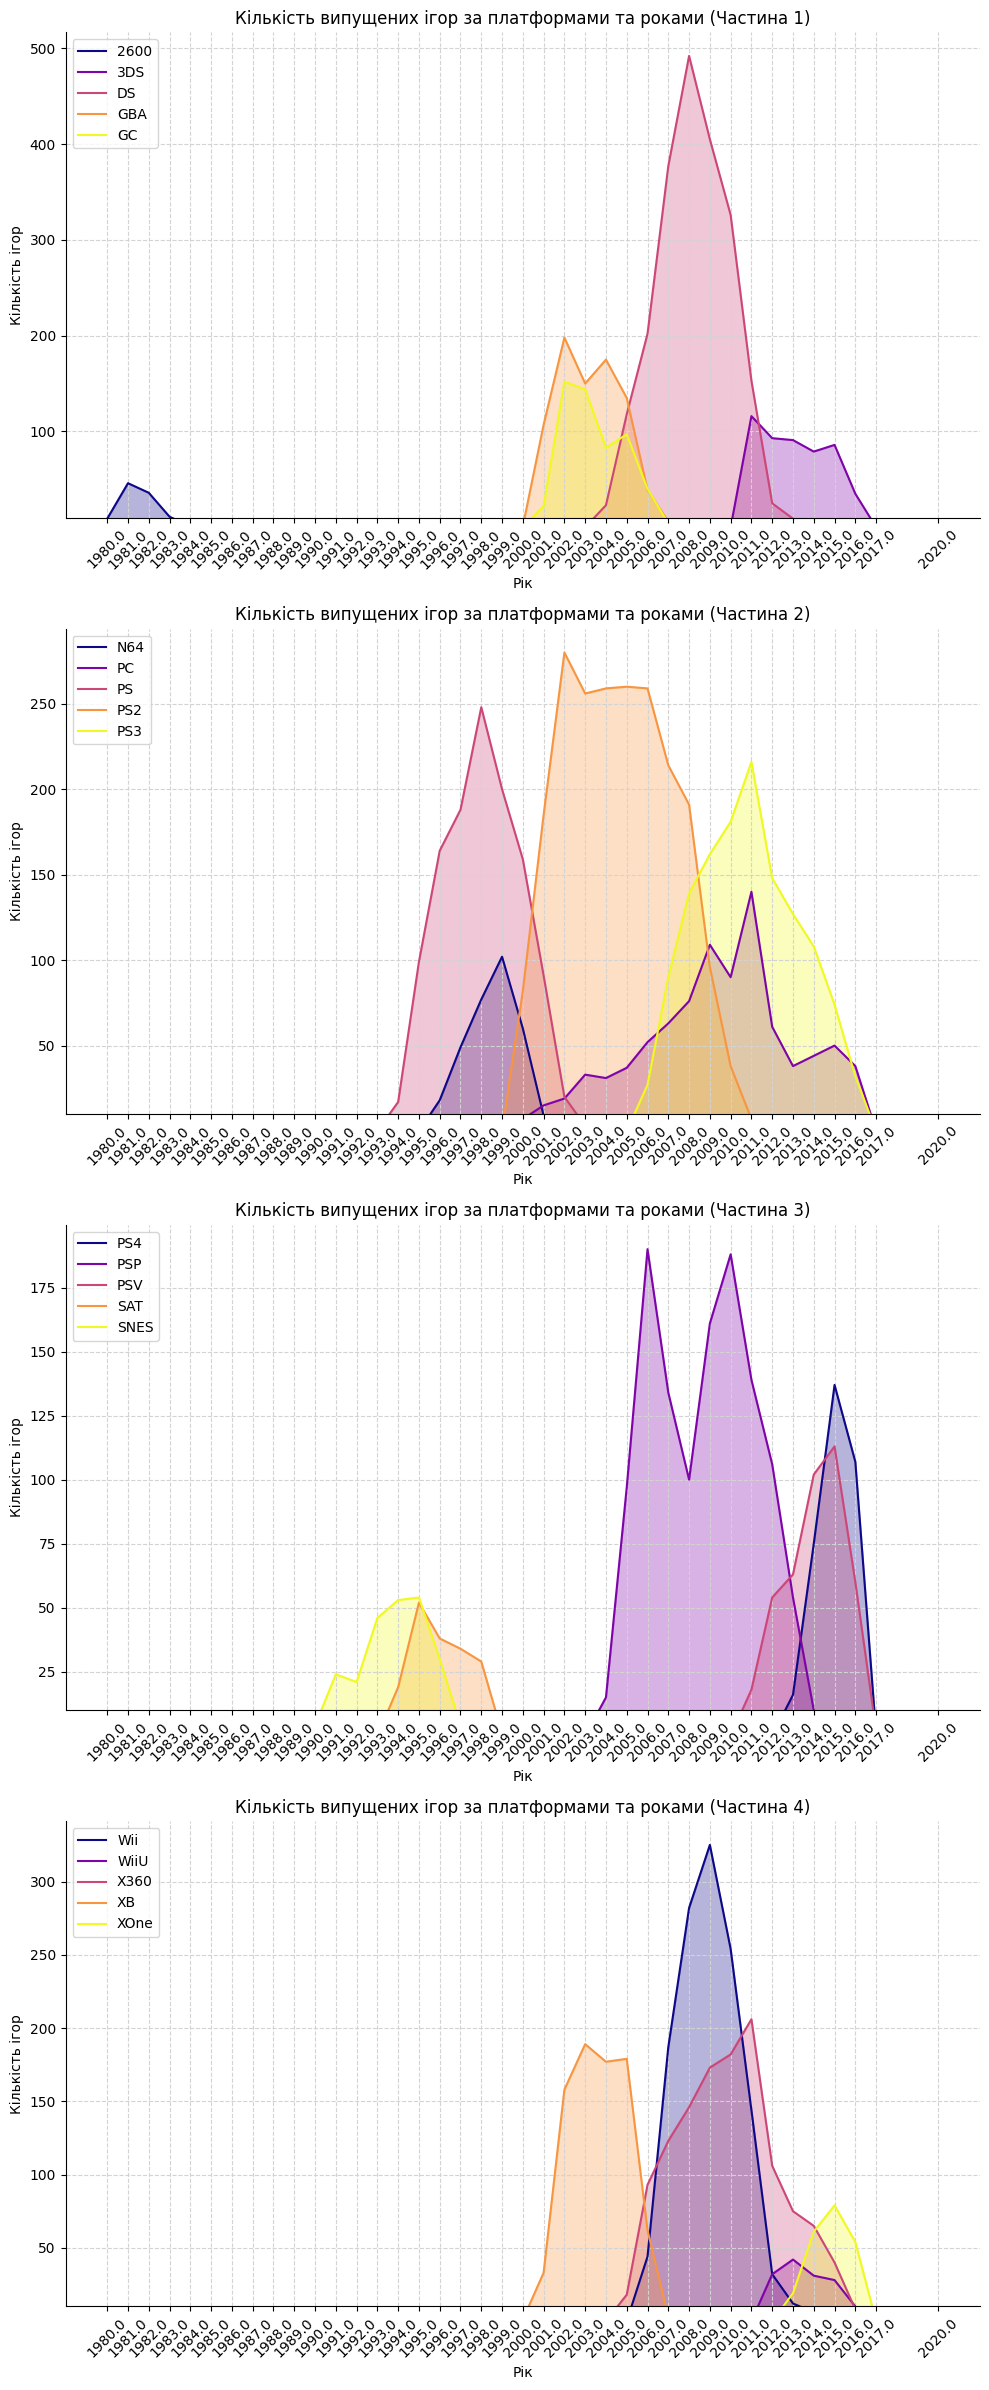

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D

# Групуємо дані за платформами та роками і підраховуємо кількість ігор
platform_sales = vgs.groupby('Platform')['Year'].value_counts().unstack(fill_value=0)

# Відбираємо лише ті платформи, які мають загальну кількість випущених ігор більше 100
platform_sales = platform_sales.loc[platform_sales.sum(axis=1) >= 100]

# Визначаємо кількість підграфіків для розміщення
num_platforms = len(platform_sales)
num_subplots = int(np.ceil(num_platforms / 5))

# Створюємо фігуру та відповідну кількість підграфіків
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 6*num_subplots))

# Ітеруємося по підграфіках
for i, ax in enumerate(axes):
    start = i * 5
    end = start + 5

    # Вибираємо підмножину платформ для поточного підграфіка
    platform_subset = platform_sales.iloc[start:end]

    # Генеруємо кольори для кожної платформи
    colors = plt.colormaps['plasma'](np.linspace(0, 1, len(platform_subset.index)))

    # Рисуємо лінії та заповнюємо простір між ними для кожної платформи
    for j, (platform, color) in enumerate(zip(platform_subset.index, colors)):
        ax.plot(platform_subset.columns, platform_subset.loc[platform], linestyle='-', color=color)
        ax.fill_between(platform_subset.columns, platform_subset.loc[platform], color=color, alpha=0.3)

    # Встановлюємо підписи осей, заголовки та налаштування для вигляду графіків
    ax.set_xlabel('Рік')
    ax.set_ylabel('Кількість ігор')
    ax.set_title(f'Кількість випущених ігор за платформами та роками (Частина {i+1})')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(color='lightgray', linestyle='--')

    ax.set_xticks(platform_subset.columns)
    ax.set_xticklabels(platform_subset.columns, rotation=45)

    # Створюємо легенду для кожної платформи
    lines = [Line2D([0], [0], color=c, label=l) for c, l in zip(colors, platform_subset.index)]
    ax.legend(handles=lines, loc='upper left')

    # Встановлюємо межі для осі Y, щоб підкреслити варіацію даних
    ax.set_ylim(10, ax.get_ylim()[1])

# Виводимо графіки
plt.tight_layout()
plt.show()


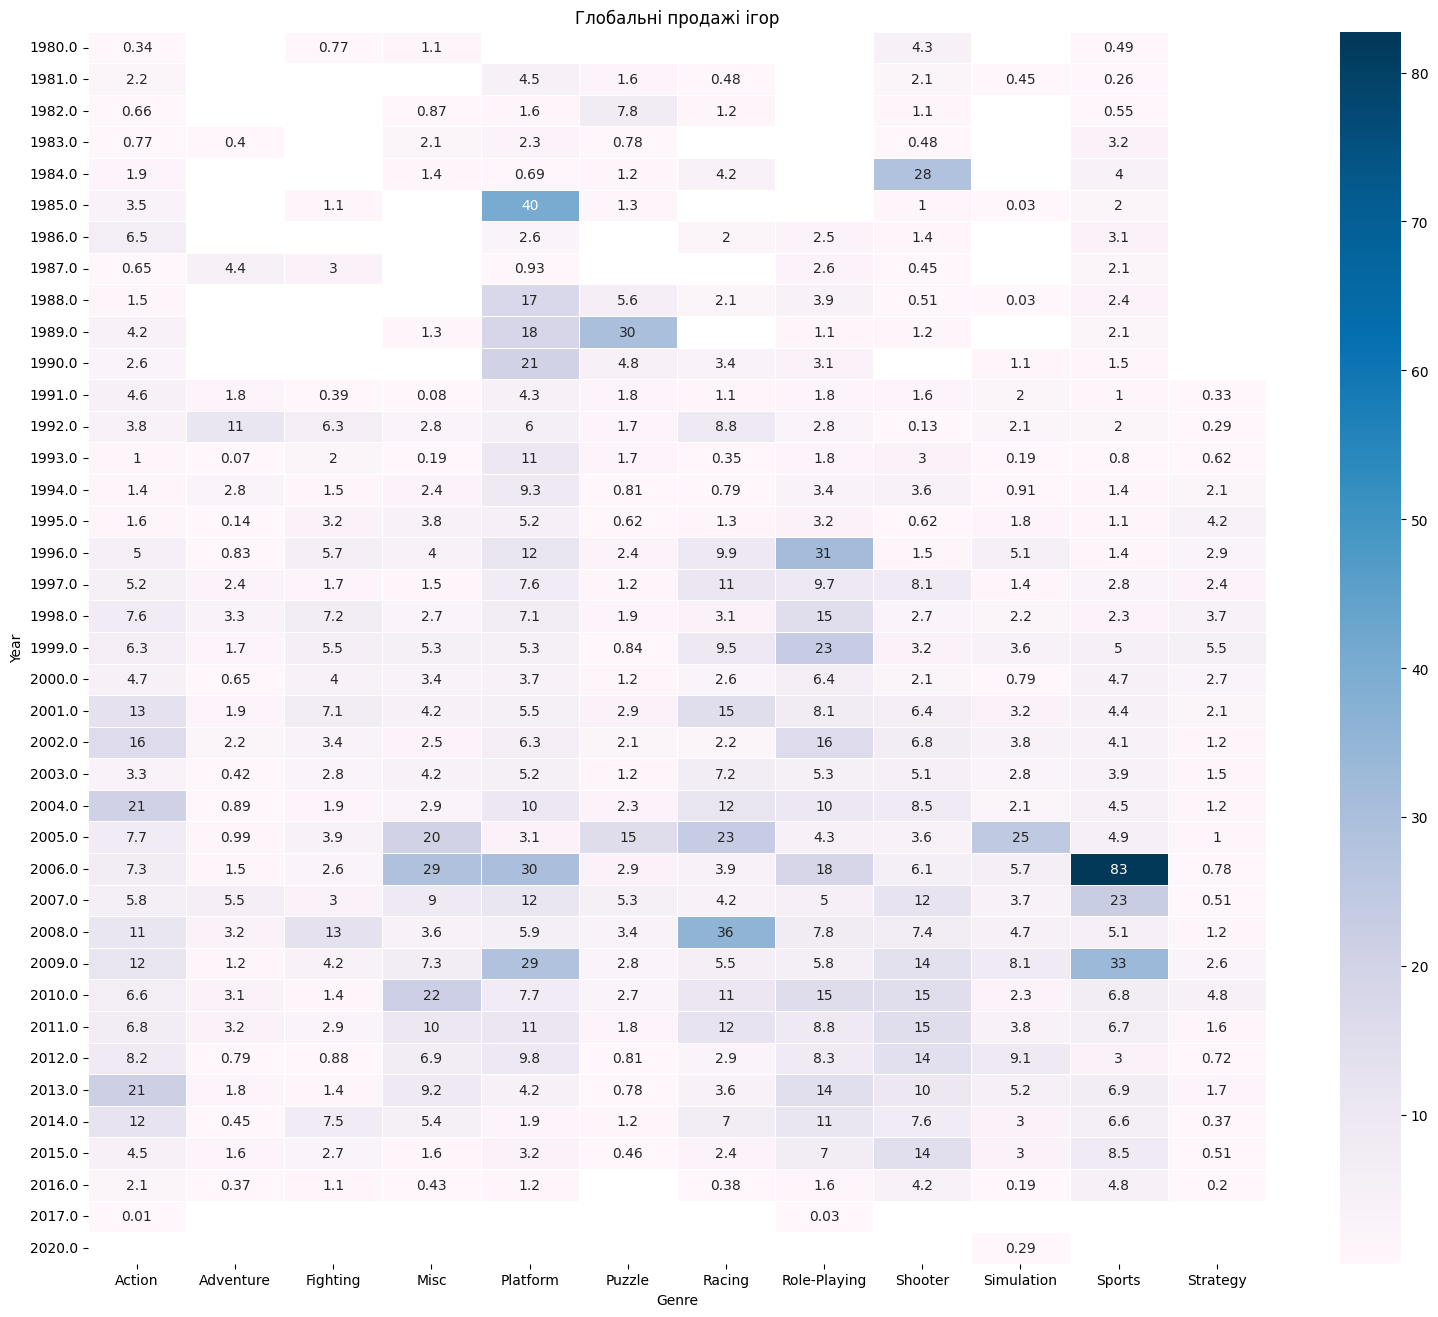

In [ ]:
# Створення сводної таблиці для глобальних продажів ігор за жанром і роком
table_sales = pd.pivot_table(vgs, values=['Global_Sales'], index=['Year'], columns=['Genre'], aggfunc='max', margins=False)

# Налаштування розміру графіка
plt.figure(figsize=(19, 16))

# Створення теплової карти з даними про глобальні продажі ігор
sns.heatmap(table_sales['Global_Sales'], linewidths=.5, annot=True, vmin=0.01, cmap='PuBu')

# Встановлення заголовку графіка
plt.title('Глобальні продажі ігор')

# Відображення графіка
plt.show()


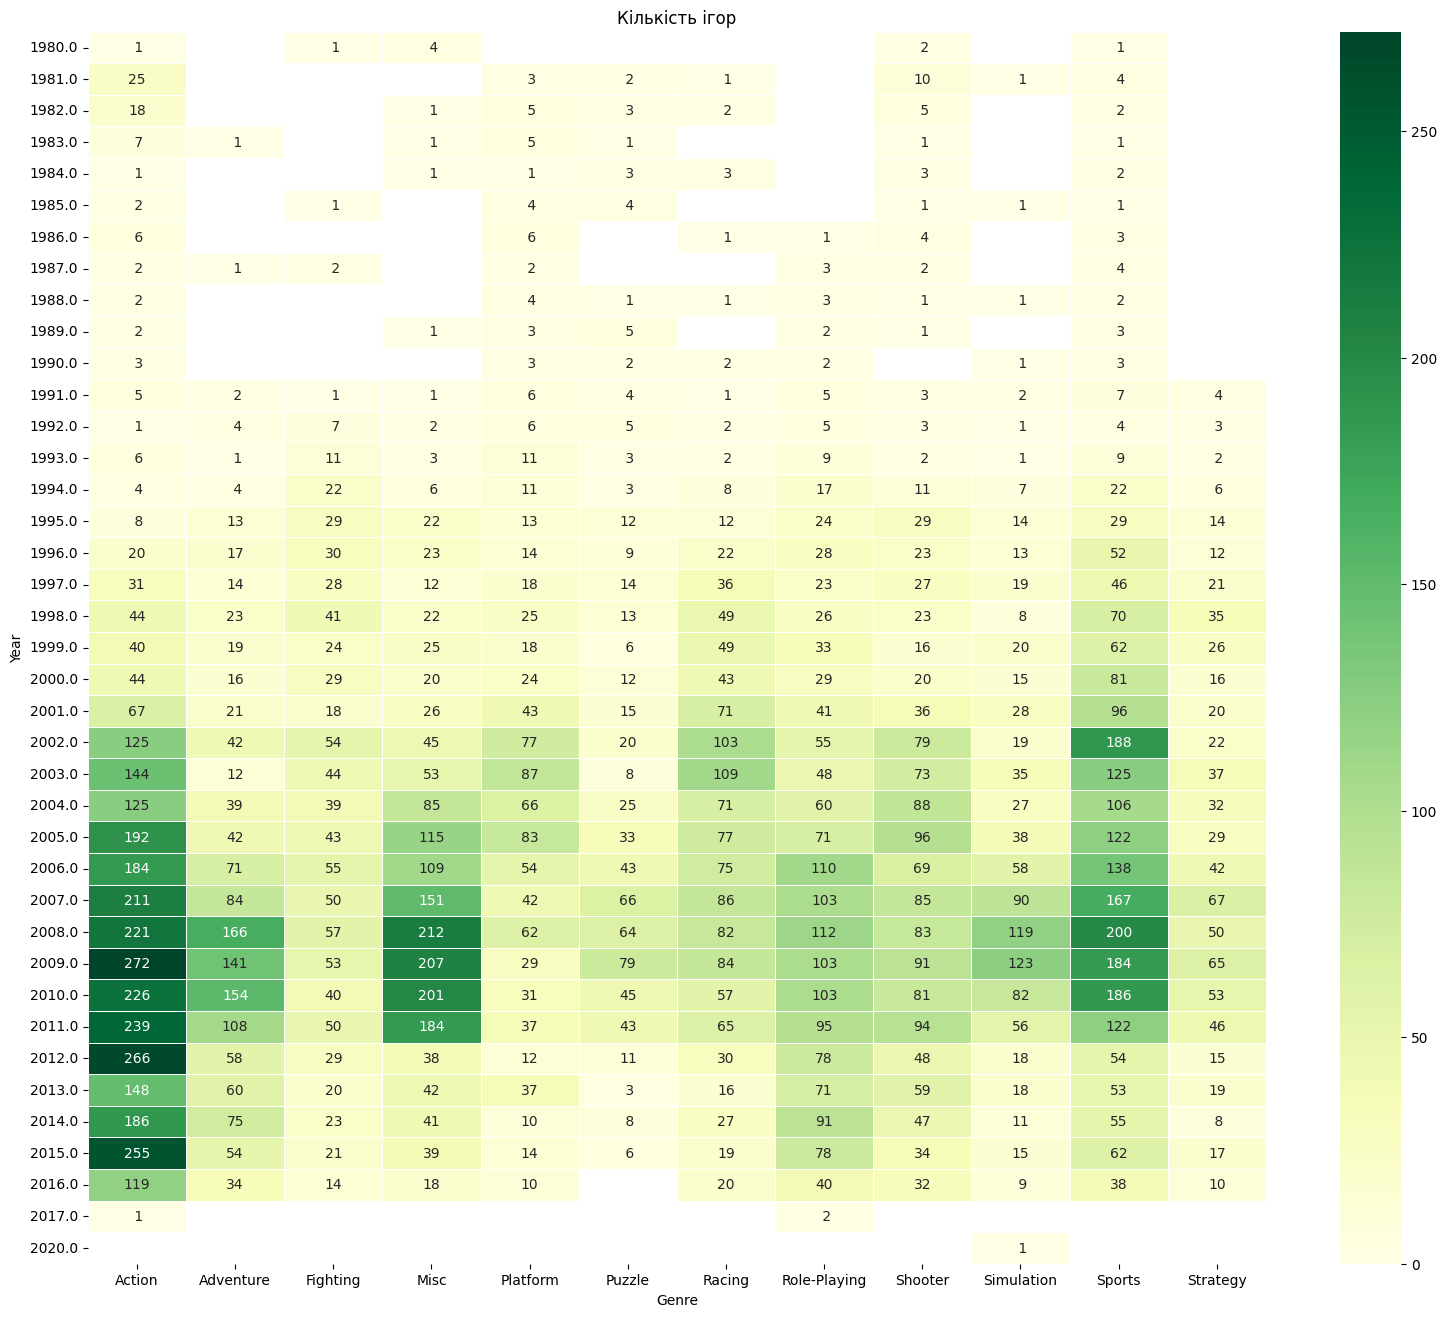

In [ ]:
# Створення сводної таблиці для підрахунку кількості ігор за жанром та роком
table_count = pd.pivot_table(vgs, values=['Global_Sales'], index=['Year'], columns=['Genre'], aggfunc='count', margins=False)

# Налаштування розміру фігури
plt.figure(figsize=(19,16))

# Створення теплової карти з використанням seaborn
sns.heatmap(table_count['Global_Sales'], linewidths=.5, annot=True, fmt='2.0f', vmin=0, cmap='YlGn')

# Встановлення заголовку діаграми
plt.title('Кількість ігор')

# Відображення теплової карти
plt.show()

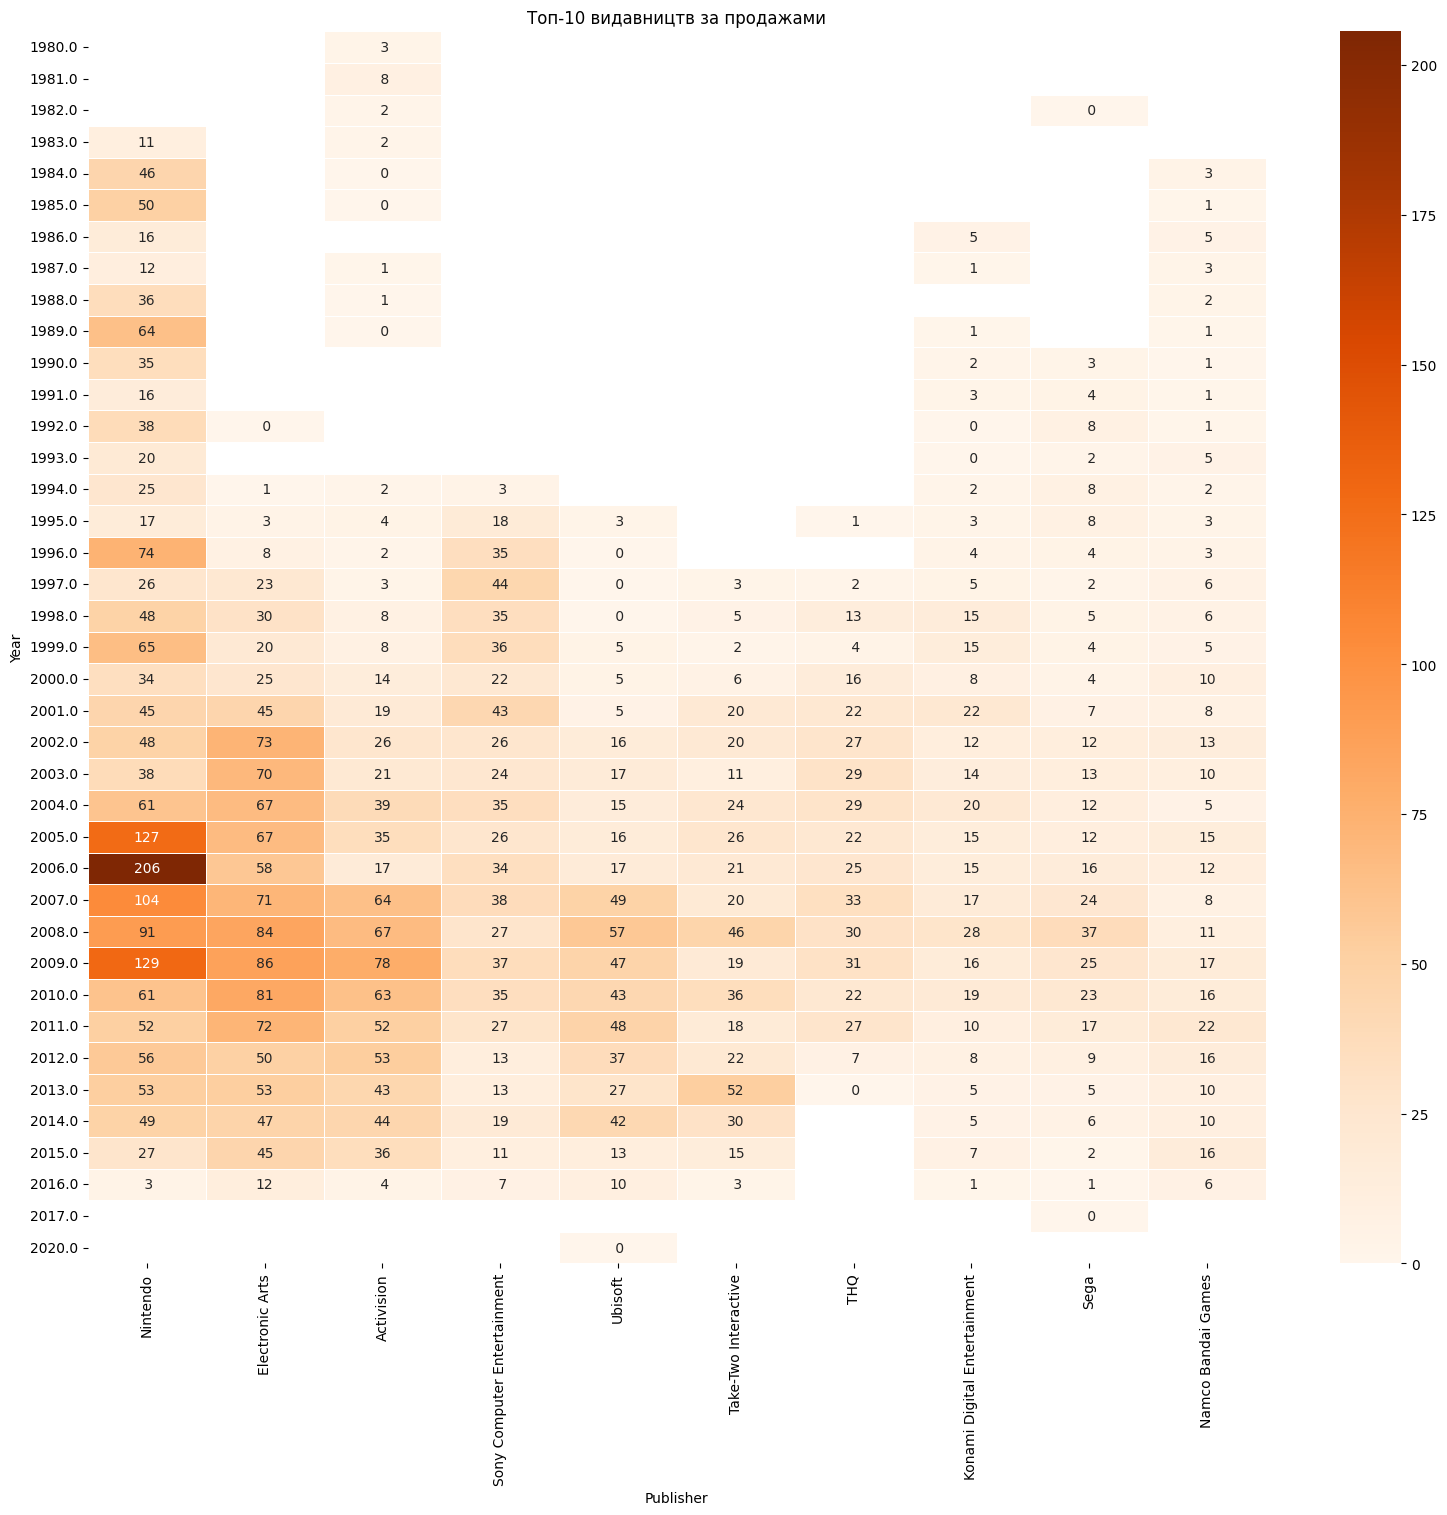

In [ ]:
#Створення сводної таблиці для підрахунку загальних продажів за роком та видавництвом
table_sales = pd.pivot_table(vgs, values=['Global_Sales'], index=['Year'], columns=['Publisher'], aggfunc='sum', margins=False)

#Вибір топ-10 видавництв за продажами
top_10_publishers = table_sales['Global_Sales'].sum().sort_values(ascending=False)[:10]

#Створення таблиці з продажами топ-10 видавництв
table_top_publishers = table_sales['Global_Sales'][top_10_publishers.index]

#Налаштування розміру та відображення теплової карти
plt.figure(figsize=(19, 16))
sns.heatmap(table_top_publishers, linewidths=0.5, annot=True, fmt='2.0f', vmin=0, cmap='Oranges')
plt.title('Топ-10 видавництв за продажами')
plt.show()



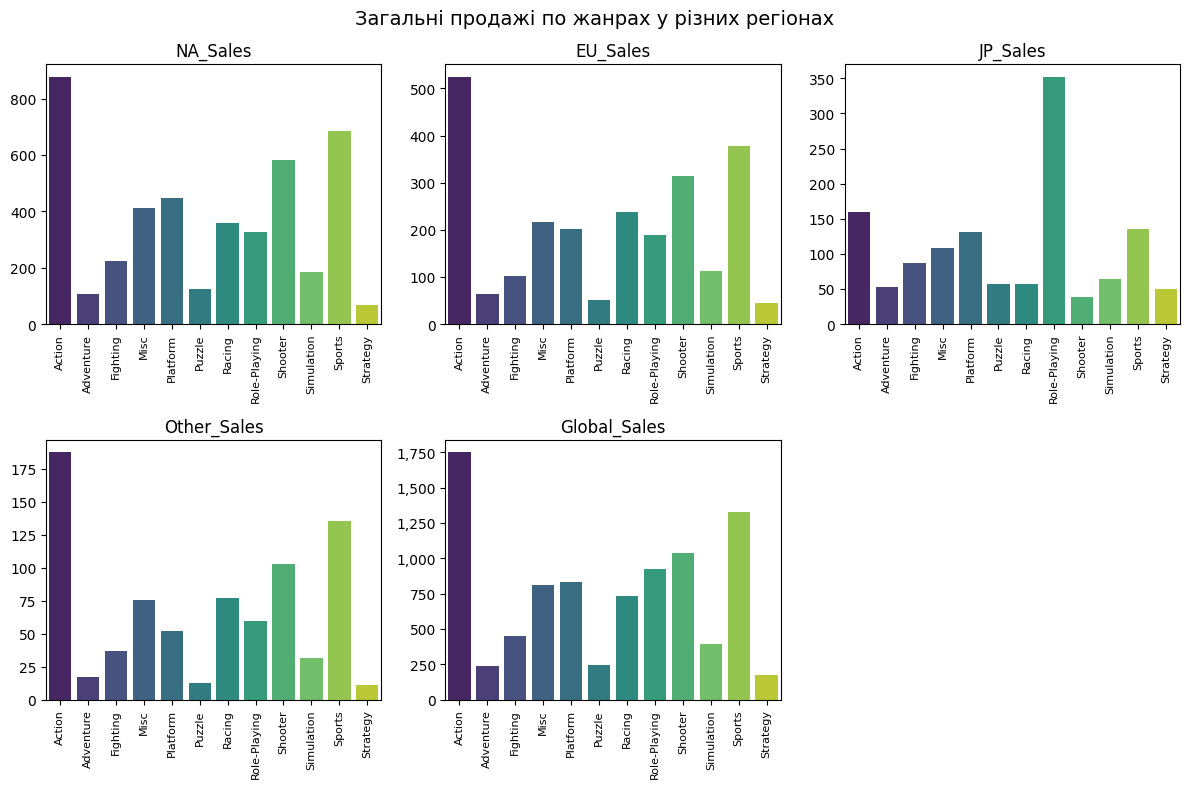

In [ ]:
import matplotlib.ticker as ticker

# Список регіонів для візуалізації
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Створення сітки графіків
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

# Прохід по кожному регіону
for i, region in enumerate(regions):
    # Групування продажів за жанром
    genre_sales = vgs.groupby('Genre')[region].sum().reset_index()

    # Побудова графіку стовпчиків
    sns.barplot(x='Genre', y=region, data=genre_sales, ax=axes[i], palette='viridis')
    axes[i].set_xlabel('', fontsize=0)
    axes[i].set_ylabel('', fontsize=0)
    axes[i].set_title('{}'.format(region), fontsize=12)
    axes[i].set_xticklabels(genre_sales['Genre'], rotation=90, fontsize=8)

    # Форматування осі Y для відображення значень з роздільниками тисяч
    axes[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(rotation=90, fontsize=8)

# Видалення зайвих графіків, якщо регіонів менше, ніж кількість графіків
if len(regions) < len(axes):
    for j in range(len(regions), len(axes)):
        fig.delaxes(axes[j])

# Налаштування заголовку та розміщення графіків
fig.suptitle('Загальні продажі по жанрах у різних регіонах', fontsize=14)
plt.tight_layout()
plt.show()


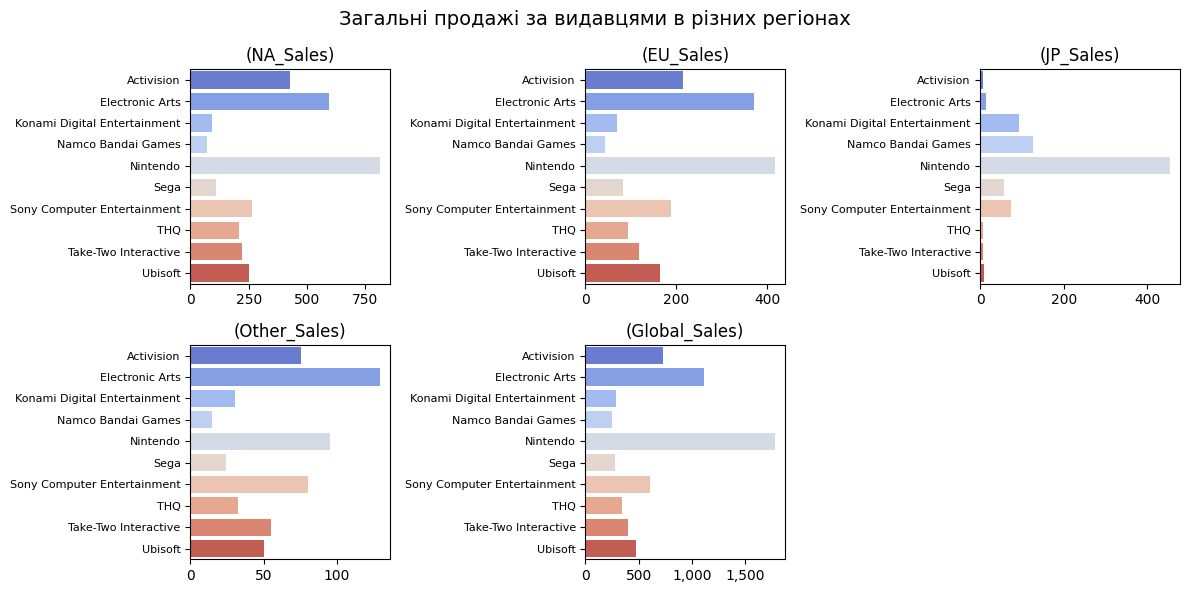

In [ ]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
top_10_developers = vgs.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index.tolist()

# Створюємо сітку графіків розміром 2 на 3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

for i, region in enumerate(regions):
    # Обчислюємо загальні продажі
    developer_sales = vgs[vgs['Publisher'].isin(top_10_developers)].groupby('Publisher')[region].sum().reset_index()

    # Створюємо стовпчикову діаграму
    sns.barplot(x=region, y='Publisher', data=developer_sales, ax=axes[i], palette='coolwarm')
    axes[i].set_xlabel('', fontsize=10)
    axes[i].set_ylabel('', fontsize=10)
    axes[i].set_title('({})'.format(region), fontsize=12)
    axes[i].set_yticklabels(developer_sales['Publisher'], fontsize=8)

    # Форматуємо ось X для зручного відображення чисел
    axes[i].xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(fontsize=8)

# Якщо кількість регіонів менша за кількість графіків, видаляємо непотрібні графіки
if len(regions) < len(axes):
    for j in range(len(regions), len(axes)):
        fig.delaxes(axes[j])

# Додаємо заголовок для всієї діаграми
fig.suptitle('Загальні продажі за видавцями в різних регіонах', fontsize=14)

plt.tight_layout()
plt.show()


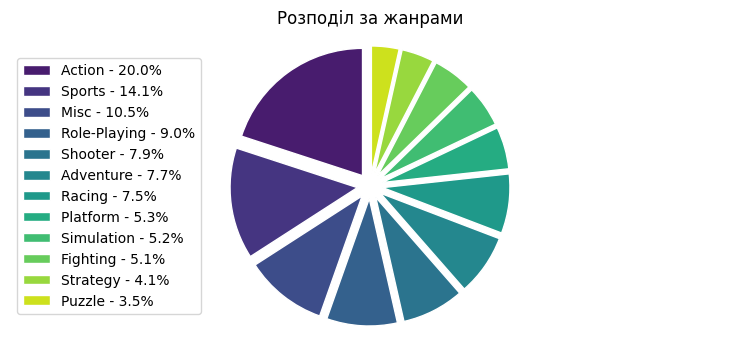

In [ ]:
plt.figure(figsize=(12, 4))  # Створення фігури з розмірами 12x4

genre_counts = vgs['Genre'].value_counts()  # Підрахунок кількості ігор для кожного жанру
colors = sns.color_palette('viridis', len(genre_counts))  # Встановлення кольорів для секторів діаграми
explode = [0.1] * len(genre_counts)  # Встановлення значення "вибуху" для секторів діаграми
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}  # Встановлення властивостей для секторів діаграми

# Побудова пай-діаграми зі врахуванням вищезазначених параметрів
patches, _ = plt.pie(genre_counts, colors=colors, explode=explode, startangle=90, wedgeprops=wedgeprops)
plt.axis('equal')  # Встановлення однакових масштабів по осям x та y

for patch in patches:
    patch.set_label('')  # Приховування підписів для секторів діаграми

total = sum(genre_counts) # Загальна кількість жанрів
percentages = [(count / total) * 100 for count in genre_counts] # Відсоткове співвідношення кожного жанру
labels = ['{0} - {1:1.1f}%'.format(label, percentage) for label, percentage in zip(genre_counts.index, percentages)] # Мітки для кожного жанру з відсотковим співвідношенням

# Побудова легенди для діаграми
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(0, 0.5), fontsize=10)  # Поміщення легенди ліворуч
plt.title('Розподіл за жанрами')  # Встановлення заголовку діаграми

plt.subplots_adjust(left=0.3)  # Відступ ліворуч

plt.show()  # Показати діаграму


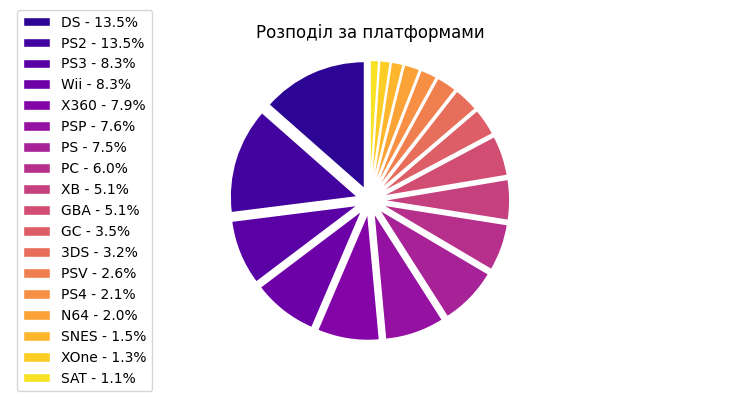

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 4))

# Розрахунок кількості ігор на кожній платформі
platform_counts = vgs['Platform'].value_counts()

# Фільтрація платформ, які становлять менше 1% від загальної кількості
platform_counts = platform_counts[platform_counts / platform_counts.sum() >= 0.01]

# Визначення кольорів для діаграми
colors = sns.color_palette('plasma', len(platform_counts))

# Встановлення параметрів вибуху секторів
explode = [0.1] * len(platform_counts)
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}

# Побудова діаграми "пиріг" (pie chart)
patches, _ = plt.pie(platform_counts, colors=colors, explode=explode, startangle=90, wedgeprops=wedgeprops)
plt.axis('equal')

# Приховання підписів секторів
for patch in patches:
    patch.set_label('')

# Розрахунок загальної кількості ігор
total = sum(platform_counts)

# Розрахунок відсоткового співвідношення для кожної платформи
percentages = [(count / total) * 100 for count in platform_counts]

# Фільтрація підписів, де відсоток менше 1%
labels = ['{0} - {1:1.1f}%'.format(label, percentage) for label, percentage in zip(platform_counts.index, percentages) if percentage >= 1]

# Додавання легенди до діаграми
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(0, 0.5), fontsize=10)

# Встановлення заголовка діаграми
plt.title('Розподіл за платформами')

# Налаштування відступів для кращого розміщення легенди
plt.subplots_adjust(left=0.3)

# Відображення діаграми
plt.show()


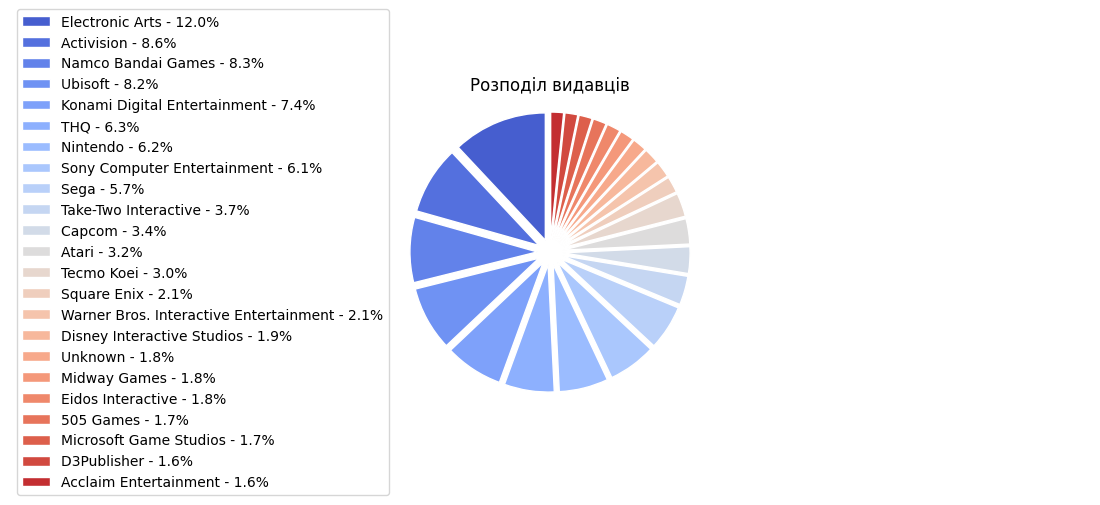

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Задаємо розмір графіку
plt.figure(figsize=(18, 4))

# Обчислюємо кількість ігор кожного видавця
publisher_counts = vgs['Publisher'].value_counts()

# Фільтруємо видавців, які складають менше 1% від загальної кількості
publisher_counts = publisher_counts[publisher_counts / publisher_counts.sum() >= 0.01]

# Задаємо кольори для секторів графіка
colors = sns.color_palette('coolwarm', len(publisher_counts))

# Задаємо значення "викиду" для секторів
explode = [0.1] * len(publisher_counts)

# Задаємо властивості секторів
wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}

# Розміщуємо сектори на графіку
patches, _ = plt.pie(publisher_counts, colors=colors, explode=explode, startangle=90, wedgeprops=wedgeprops)

# Задаємо однакові масштаби осей для отримання кругової форми графіку
plt.axis('equal')

# Збираємо підписи для легенди
total = sum(publisher_counts)
percentages = [(count / total) * 100 for count in publisher_counts]

# Фільтруємо значення відсотків менше 1%
labels = ['{0} - {1:1.1f}%'.format(label, percentage) for label, percentage in zip(publisher_counts.index, percentages) if percentage >= 1]

# Розміщуємо легенду на графіку
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(0, 0.5), fontsize=10)

# Задаємо заголовок графіку
plt.title('Розподіл видавців')

# Дозволяємо відступи для підписів видавців
plt.subplots_adjust(left=0.3)

# Показуємо графік
plt.show()


<ipython-input-18-6e2ea7e29953>:11: UserWarning: The palette list has more values (32) than needed (31), which may not be intended.
  sns.scatterplot(data=vgs, x='Year', y='Platform', hue='Platform', palette=palette, s=100, alpha=0.7)


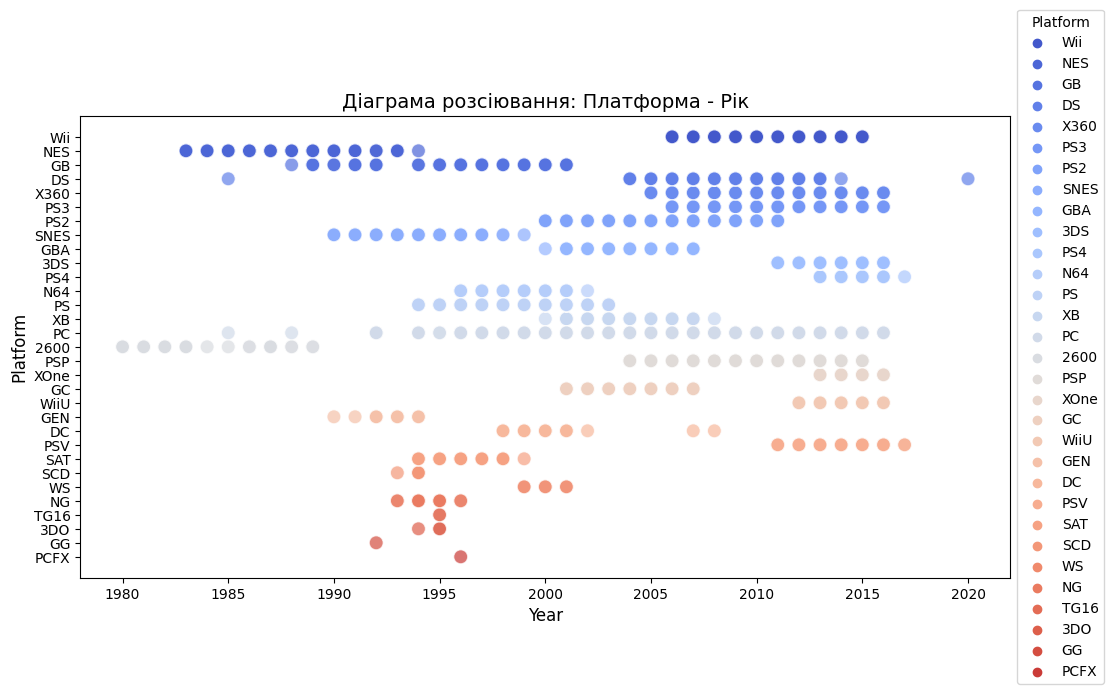

In [ ]:
n_colors = 32
# Визначення кількості кольорів у палітрі

palette = sns.color_palette('coolwarm', n_colors=n_colors)
# Створення палітри кольорів за допомогою функції color_palette з використанням 'coolwarm' палітри
# та вказанням кількості кольорів

plt.figure(figsize=(12, 6))
# Створення фігури з розмірами 12 на 6

sns.scatterplot(data=vgs, x='Year', y='Platform', hue='Platform', palette=palette, s=100, alpha=0.7)
# Побудова діаграми розсіювання за допомогою функції scatterplot з використанням даних зі змінними vgs,
# де вісь X - це рік, вісь Y - це платформа, а кольори точок відповідають платформі.
# Використовується створена палітра кольорів, розмір точок - 100, прозорість - 0.7

plt.xlabel('Year', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.title('Діаграма розсіювання: Платформа - Рік', fontsize=14)
# Встановлення підписів для осей X і Y, а також заголовка діаграми

plt.grid(False)
# Вимкнення сітки на діаграмі

plt.yticks(fontsize=10)
# Задання розміру шрифту для позначок на осі Y

plt.legend(title='Platform', title_fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
# Відображення легенди з підписом "Platform" та налаштування розміру шрифту та положення легенди

plt.show()
# Показати діаграму


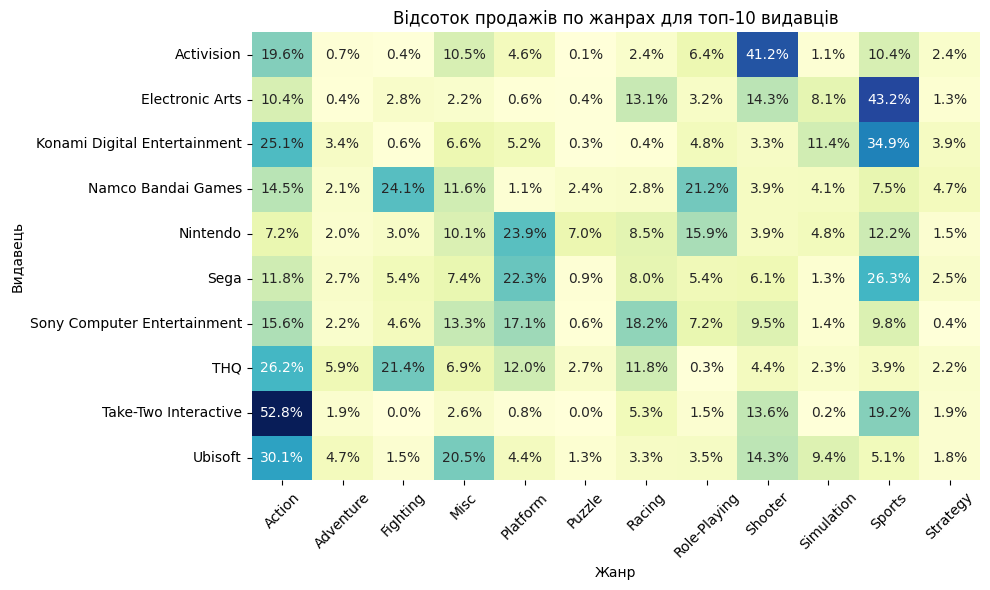

In [ ]:
top_10_developers = vgs.groupby('Publisher')['Global_Sales'].sum().nlargest(10).index.tolist() # Обчислюємо список топ-10 видавців за загальними продажами
filtered_data = vgs[vgs['Publisher'].isin(top_10_developers)] # Фільтруємо дані за участю топ-10 видавців

sales_by_publisher_genre = filtered_data.groupby(['Publisher', 'Genre'])['Global_Sales'].sum().reset_index() # Обчислюємо загальні продажі по жанрах для кожного видавця
sales_by_publisher_genre['Percentage'] = (sales_by_publisher_genre['Global_Sales'] / sales_by_publisher_genre.groupby('Publisher')['Global_Sales'].transform('sum')) # Обчислюємо відсоток продажів по жанрах для кожного видавця

heatmap_data = pd.pivot_table(sales_by_publisher_genre, values='Percentage', index='Publisher', columns='Genre', fill_value=0) # Створюємо таблицю для побудови теплової карти

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1%', cbar=False) # Побудова теплової карти з використанням бібліотеки seaborn
plt.xlabel('Жанр') # Підпис для осі X
plt.ylabel('Видавець') # Підпис для осі Y
plt.title('Відсоток продажів по жанрах для топ-10 видавців') # Заголовок графіку
plt.xticks(rotation=45) # Обертання підписів на осі X для зручності
plt.yticks(rotation=0) # Обертання підписів на осі Y для зручності
plt.tight_layout() # Оптимізація розміщення елементів графіку
plt.show() # Показати графік



In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import warnings
from mlxtend.frequent_patterns import association_rules

warnings.filterwarnings("ignore", category=DeprecationWarning)


categorical_features = ['Genre', 'Publisher', 'Platform', 'Global_Sales']

# Конвертувати категоріальні ознаки в рядки
vgs[categorical_features] = vgs[categorical_features].astype(str)

# Створити список транзакцій
transactions = vgs[categorical_features].values.tolist()

# Ініціалізувати TransactionEncoder
te = TransactionEncoder()

# Застосувати TransactionEncoder до списку транзакцій
te_ary = te.fit_transform(transactions)

# Створити DataFrame з закодованими даними
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Застосувати алгоритм Apriori для знаходження часто зустрічаються наборів
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Вивести результати
print(frequent_itemsets)

     support                        itemsets
0   0.064526                          (0.02)
1   0.199783                        (Action)
2   0.058742                    (Activision)
3   0.077479                     (Adventure)
4   0.130317                            (DS)
5   0.081395               (Electronic Arts)
6   0.051090                      (Fighting)
7   0.050127  (Konami Digital Entertainment)
8   0.104772                          (Misc)
9   0.056151            (Namco Bandai Games)
10  0.057838                            (PC)
11  0.072057                            (PS)
12  0.130196                           (PS2)
13  0.080070                           (PS3)
14  0.073081                           (PSP)
15  0.053380                      (Platform)
16  0.075250                        (Racing)
17  0.089649                  (Role-Playing)
18  0.078925                       (Shooter)
19  0.052235                    (Simulation)
20  0.141342                        (Sports)
21  0.0554

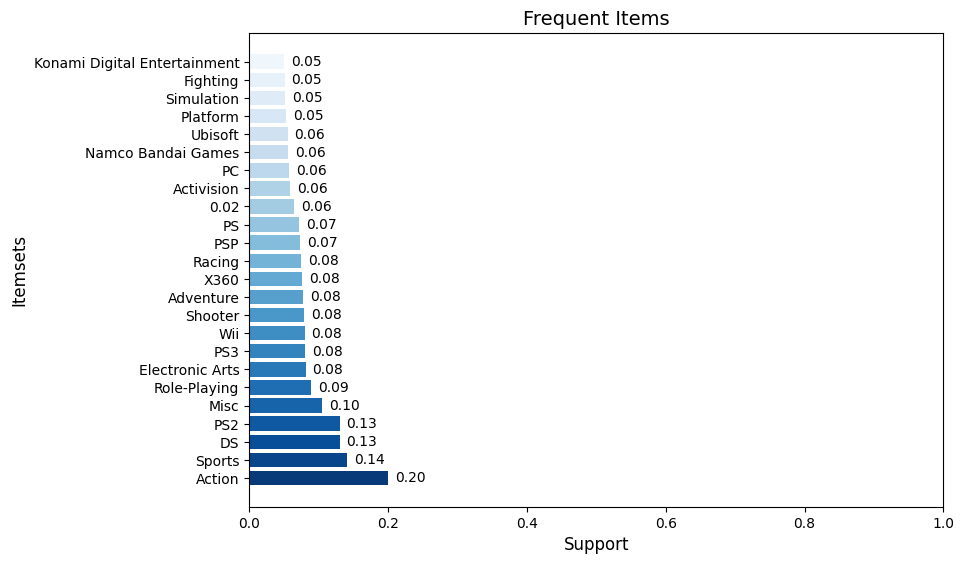

In [ ]:
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))
colors = sns.color_palette('Blues_r', len(frequent_itemsets))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(range(len(frequent_itemsets)), frequent_itemsets['support'], color=colors)

ax.set_xlabel('Support', fontsize=12)  # Підпис осі x
ax.set_ylabel('Itemsets', fontsize=12)  # Підпис осі y
ax.set_title('Frequent Items', fontsize=14)  # Заголовок графіку
ax.set_yticks(range(len(frequent_itemsets)))  # Встановлення позначок на осі y
ax.set_yticklabels(frequent_itemsets['itemsets'], fontsize=10)  # Встановлення позначок для кожного itemset на осі y
ax.set_xlim(0, 1)  # Встановлення обмежень для осі x

for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
            f'{frequent_itemsets.iloc[i]["support"]:.2f}', va='center')  # Додавання тексту до кожної планки графіку

plt.tight_layout(pad=2)  # Налаштування відступів
plt.show()  # Показ графіку


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

categorical_features = ['Genre', 'Publisher', 'Platform', 'Global_Sales']

# Конвертуємо категоріальні ознаки в рядки
vgs[categorical_features] = vgs[categorical_features].astype(str)

# Створюємо список транзакцій
transactions = vgs[categorical_features].values.tolist()

# Ініціалізуємо об'єкт TransactionEncoder
te = TransactionEncoder()

# Застосовуємо TransactionEncoder до списку транзакцій і отримуємо бінарну матрицю
te_ary = te.fit_transform(transactions)

# Створюємо DataFrame з бінарною матрицею і назвами колонок
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

min_support = 0.01

# Знаходимо часті набори за алгоритмом Apriori
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

# Додаємо колонку з довжиною набору
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Фільтруємо набори за довжиною = 2
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]

# Виводимо результати
print(frequent_itemsets)


      support                                itemsets  length
79   0.011266                          (Action, 0.02)       2
80   0.012712                       (Adventure, 0.02)       2
81   0.010905                              (0.02, PC)       2
82   0.010965                           (Action, 3DS)       2
83   0.018677                    (Action, Activision)       2
84   0.020665                            (DS, Action)       2
85   0.011025               (Action, Electronic Arts)       2
86   0.010061                           (Action, GBA)       2
87   0.014942            (Action, Namco Bandai Games)       2
88   0.020966                           (Action, PS2)       2
89   0.022894                           (Action, PS3)       2
90   0.013375                           (Action, PSP)       2
91   0.011688                           (Action, THQ)       2
92   0.011628                       (Ubisoft, Action)       2
93   0.014339                           (Action, Wii)       2
94   0.0

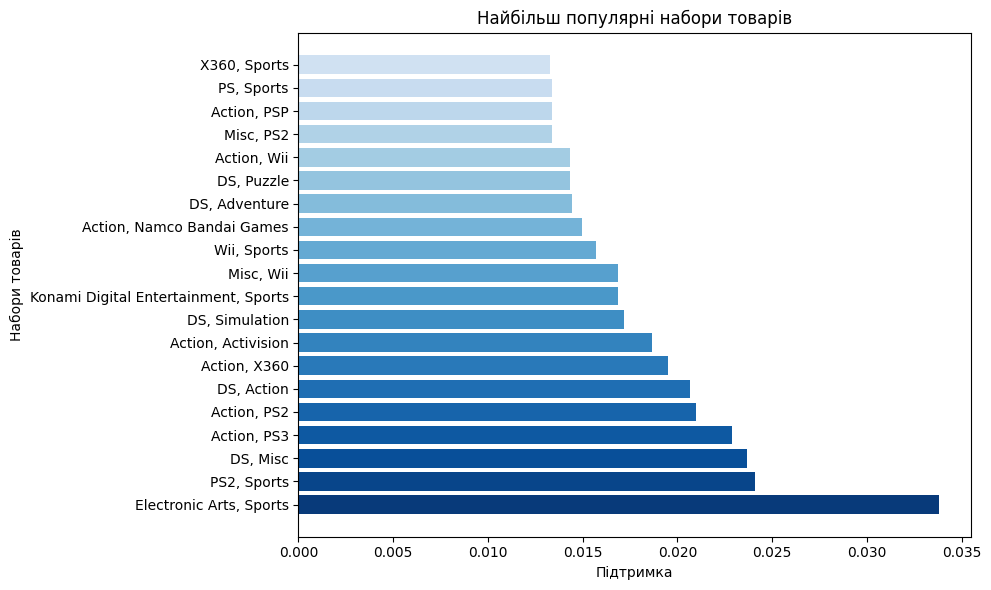

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# frequent_itemsets - це датафрейм, який містить результати асоціативного аналізу
# Відсортовуємо його за значенням підтримки у спадаючому порядку і обмежуємо 20 найбільш популярними наборами товарів
frequent_itemsets2 = frequent_itemsets.sort_values(by='support', ascending=False).head(20)

# Побудова горизонтальної стовпчастої діаграми
plt.figure(figsize=(10, 6))
plt.barh(range(len(frequent_itemsets2)), frequent_itemsets2['support'], tick_label=[', '.join(itemset) for itemset in frequent_itemsets2['itemsets']], color=colors)

# Встановлення підписів для осей та заголовку діаграми
plt.xlabel('Підтримка')
plt.ylabel('Набори товарів')
plt.title('Найбільш популярні набори товарів')

# Автоматичне розміщення елементів діаграми для кращої видимості
plt.tight_layout()

# Показати діаграму
plt.show()


In [ ]:
df_filtered = vgs.copy()


In [ ]:
from sklearn.cluster import KMeans

# Визначаємо ознаки, які будемо використовувати для кластеризації
features = ['NA_Sales', 'EU_Sales', 'Global_Sales']
X_encoded = df_filtered[features]

# Визначаємо кількість кластерів, які хочемо сформувати
k = 5
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=40)

# Виконуємо кластеризацію з використанням K-means
kmeans.fit(X_encoded)

# Отримуємо мітки кластерів для кожного зразка
labels = kmeans.predict(X_encoded)

# Додаємо колонку 'Cluster' до вихідного DataFrame з отриманими мітками кластерів
df_filtered['Cluster'] = labels

print(labels)
print(df_filtered[['NA_Sales', 'EU_Sales', 'Global_Sales', 'Cluster']])


[2 4 4 ... 0 0 0]
       NA_Sales  EU_Sales  Global_Sales  Cluster
0        41.490    29.020        82.740        2
1        29.080     3.580        40.240        4
2        15.850    12.880        35.820        4
3        15.750    11.010        33.000        4
4        11.270     8.890        31.370        4
...         ...       ...           ...      ...
16593     0.010     0.000         0.010        0
16594     0.010     0.000         0.010        0
16595     0.000     0.000         0.010        0
16596     0.000     0.010         0.010        0
16597     0.010     0.000         0.010        0

[16598 rows x 4 columns]


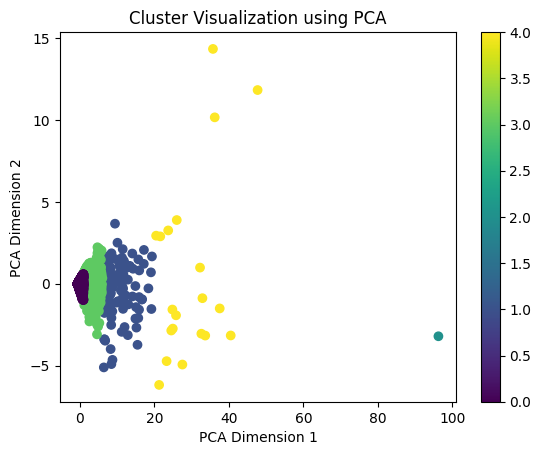

In [ ]:
from sklearn.decomposition import PCA

# Ініціалізуємо об'єкт PCA з двома компонентами
pca = PCA(n_components=2)

# Застосовуємо PCA до даних для зменшення розмірності до 2D
X_pca = pca.fit_transform(X_encoded)

# Візуалізація результатів на графіку розсіювання
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('Cluster Visualization using PCA')
plt.colorbar()
plt.show()


In [ ]:
import scipy.stats as stats
pd.options.display.float_format = '{:.3f}'.format
#0 3 1 4 2
numeric_columns = ['NA_Sales', 'EU_Sales', 'Global_Sales']
grouped_stats = df_filtered.groupby('Cluster')[numeric_columns].agg(['mean', 'median'])

# Виведення обчислених статистичних показників
print(grouped_stats)

        NA_Sales        EU_Sales        Global_Sales       
            mean median     mean median         mean median
Cluster                                                    
0          0.128  0.060    0.065  0.020        0.263  0.140
1          4.274  3.880    2.860  2.640        9.168  8.060
2         41.490 41.490   29.020 29.020       82.740 82.740
3          1.254  1.110    0.715  0.600        2.473  2.100
4         13.388 11.325    6.822  7.800       26.282 24.090


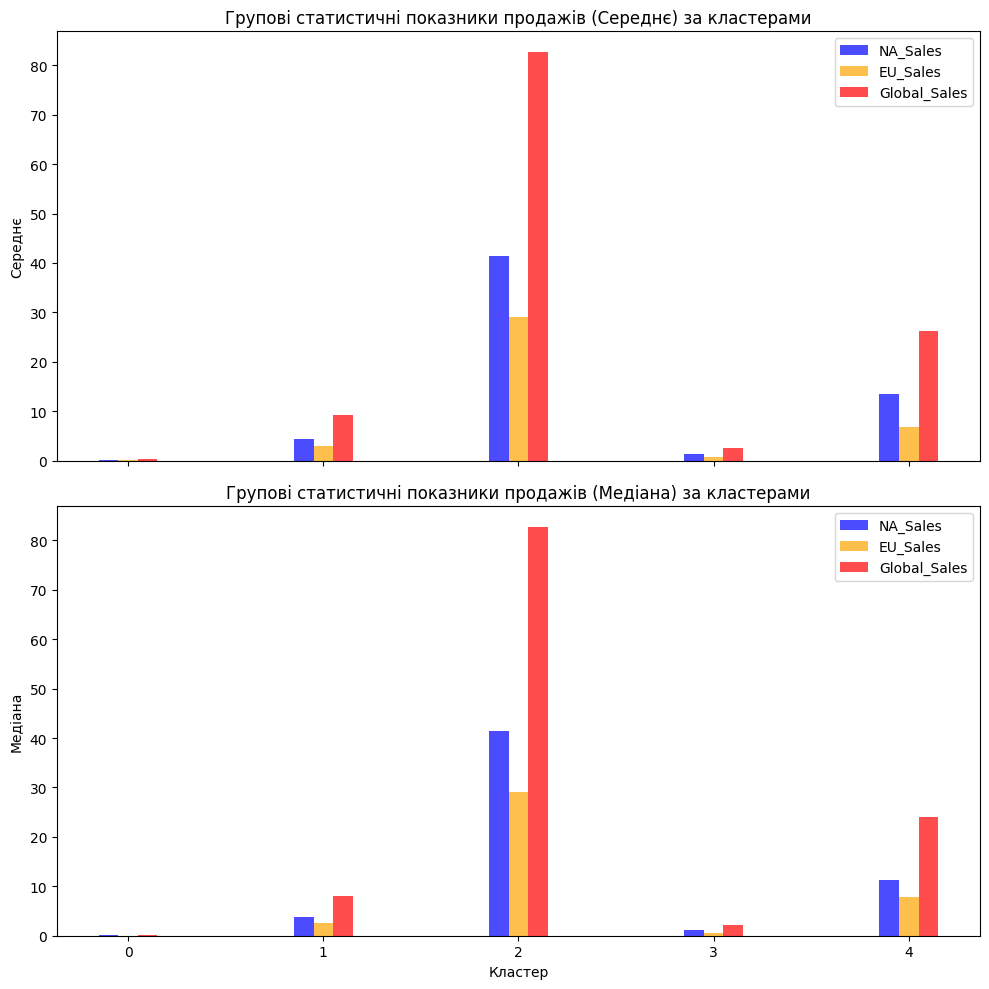

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Створення фігури та двох підграфіків
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

clusters = grouped_stats.index
features = ['NA_Sales', 'EU_Sales', 'Global_Sales']
colors = ['blue', 'orange', 'red']
x_pos = np.arange(len(clusters))

bar_width = 0.1
opacity = 0.7

# Побудова графіку середніх значень
for i, feature in enumerate(features):
    values_mean = grouped_stats[(feature, 'mean')].values.flatten()
    ax1.bar(x_pos + i * bar_width, values_mean, color=colors[i], width=bar_width, label=feature, alpha=opacity)

# Побудова графіку медіанних значень
for i, feature in enumerate(features):
    values_median = grouped_stats[(feature, 'median')].values.flatten()
    ax2.bar(x_pos + i * bar_width, values_median, color=colors[i], width=bar_width, label=feature, alpha=opacity)

# Налаштування міток та заголовків графіків
ax1.set_xticks(x_pos + (len(features) - 1) * bar_width / 2)
ax1.set_xticklabels(clusters)
ax2.set_xticks(x_pos + (len(features) - 1) * bar_width / 2)
ax2.set_xticklabels(clusters)

ax1.legend(loc='upper right')
ax1.set_ylabel('Середнє')
ax1.set_title('Групові статистичні показники продажів (Середнє) за кластерами')

ax2.legend(loc='upper right')
ax2.set_ylabel('Медіана')
ax2.set_xlabel('Кластер')
ax2.set_title('Групові статистичні показники продажів (Медіана) за кластерами')

plt.tight_layout()
plt.show()


In [ ]:
features = ['NA_Sales', 'EU_Sales', 'Global_Sales']

for a in range(5):
    cluster_data = df_filtered[df_filtered['Cluster'] == a]
    most_common_values = cluster_data[features].mode().iloc[0]
    max_sales = cluster_data['Global_Sales'].max()

    print("Найчастіші значення в кластері", a, ":")
    print(most_common_values)
    print("Максимальне значення продажів в кластері", a, ":")
    print(max_sales)
    print()


Найчастіші значення в кластері 0 :
NA_Sales       0.000
EU_Sales       0.000
Global_Sales   0.020
Name: 0, dtype: float64
Максимальне значення продажів в кластері 0 :
1.71

Найчастіші значення в кластері 1 :
NA_Sales       2.550
EU_Sales       2.830
Global_Sales   6.030
Name: 0, dtype: float64
Максимальне значення продажів в кластері 1 :
18.36

Найчастіші значення в кластері 2 :
NA_Sales       41.490
EU_Sales       29.020
Global_Sales   82.740
Name: 0, dtype: float64
Максимальне значення продажів в кластері 2 :
82.74

Найчастіші значення в кластері 3 :
NA_Sales       0.000
EU_Sales       0.000
Global_Sales   1.460
Name: 0, dtype: float64
Максимальне значення продажів в кластері 3 :
5.95

Найчастіші значення в кластері 4 :
NA_Sales        4.750
EU_Sales        0.400
Global_Sales   18.140
Name: 0, dtype: float64
Максимальне значення продажів в кластері 4 :
40.24



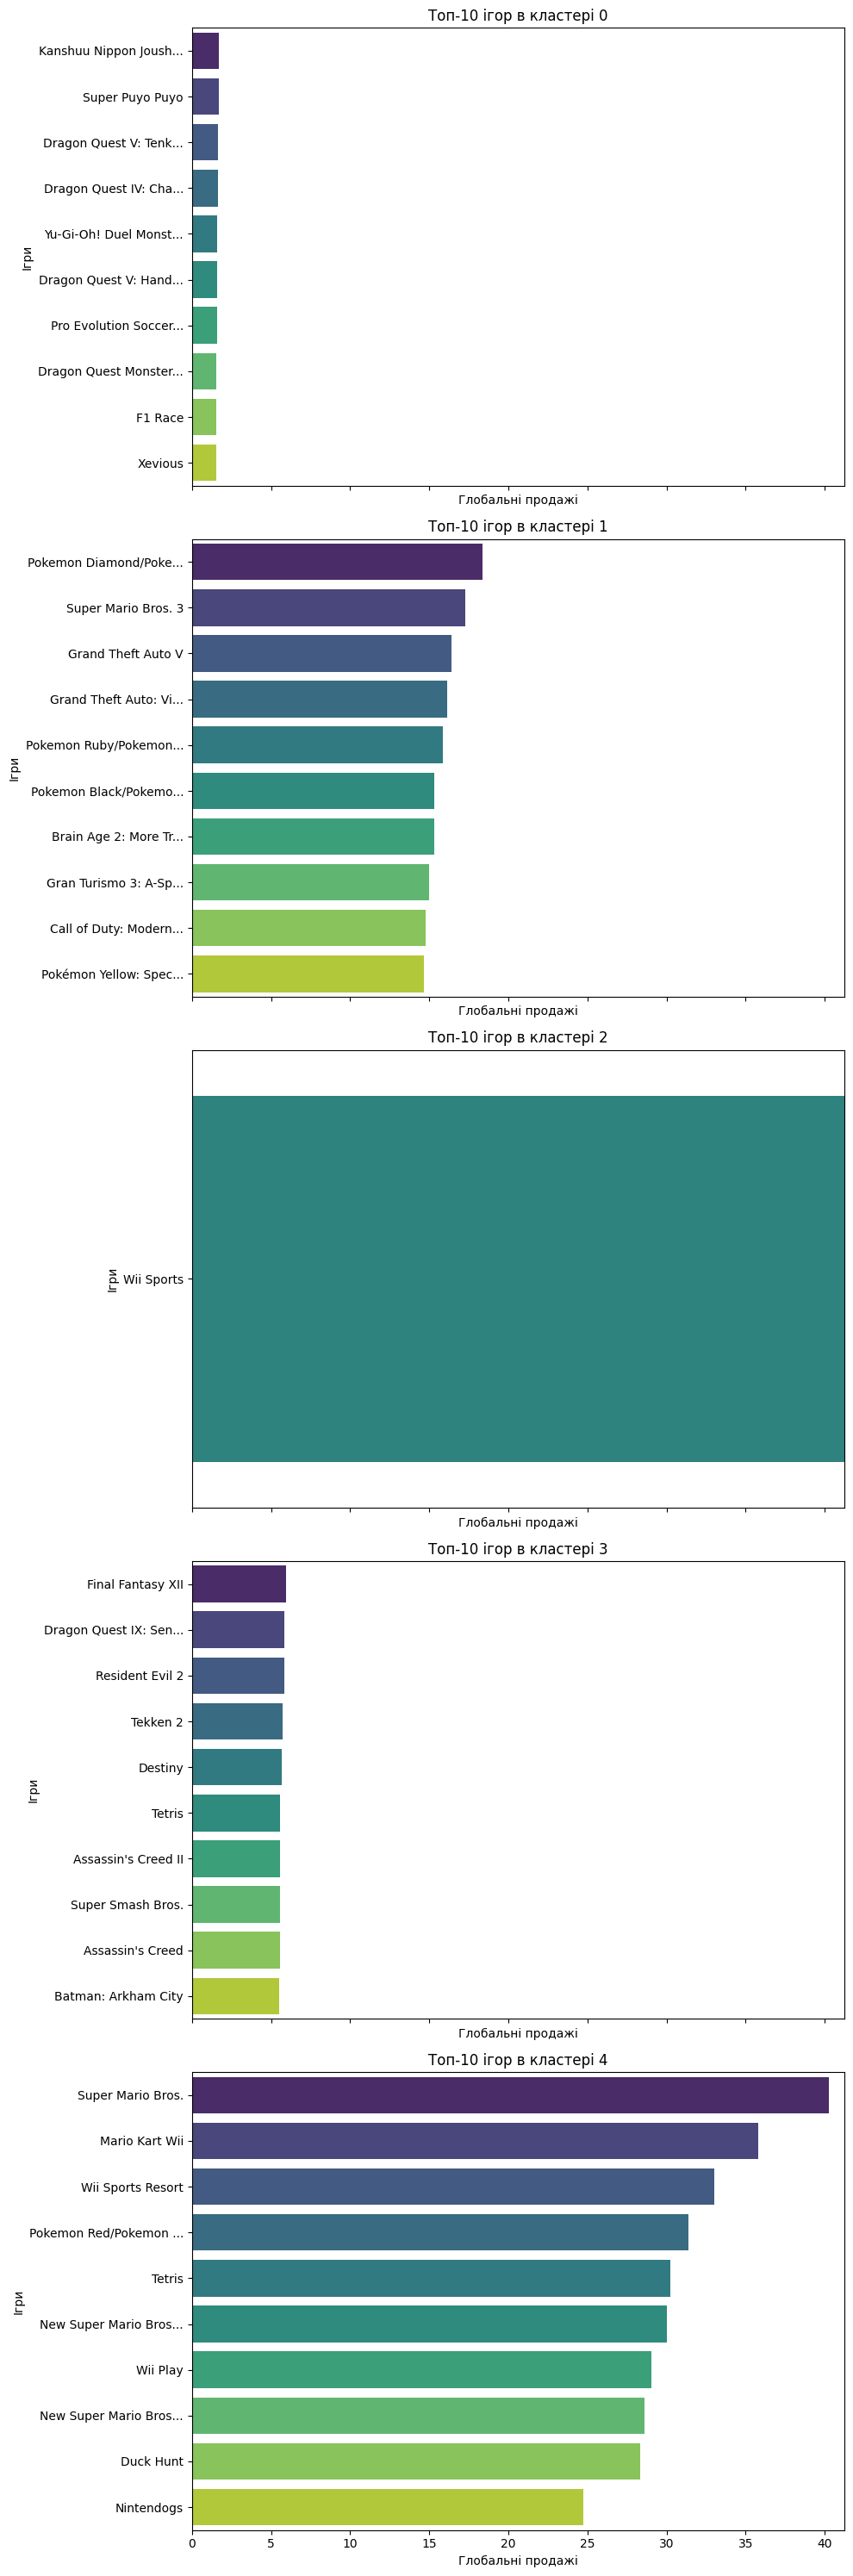

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30), sharex=True)

for a, ax in zip(range(5), axes):
    cluster_data = df_filtered[df_filtered['Cluster'] == a]
    top_10_games = cluster_data.nlargest(10, 'Global_Sales')

    ax = sns.barplot(x='Global_Sales', y='Name', data=top_10_games, palette='viridis', errorbar=None, ax=ax)
    ax.set_xlabel('Глобальні продажі')
    ax.set_ylabel('Ігри')
    ax.set_title('Топ-10 ігор в кластері ' + str(a))
    ax.set_xlim(0, top_10_games['Global_Sales'].max() + 1)

    game_labels = [name[:20] + '...' if len(name) > 20 else name for name in top_10_games['Name']]
    ax.set_yticklabels(game_labels)

plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales','Rank']
features = [col for col in df_filtered.columns if col not in sales_columns]
target = 'Global_Sales'

X = df_filtered[features]
y = df_filtered[target]

# Ініціалізація LabelEncoder для перетворення категоріальних ознак на числові значення
label_encoder = LabelEncoder()
X_encoded = X.copy()
for feature in features:
    # Перетворення категоріальної ознаки на числове значення
    X_encoded[feature] = label_encoder.fit_transform(X[feature])

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=1000)

# Ініціалізація моделі RandomForestRegressor з 200 деревами
model = RandomForestRegressor(n_estimators=200, random_state=300)
model.fit(X_train, y_train)

# Прогнозування значень на тестовому наборі
y_pred = model.predict(X_test)

# Обчислення точності моделі
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5439986565268963


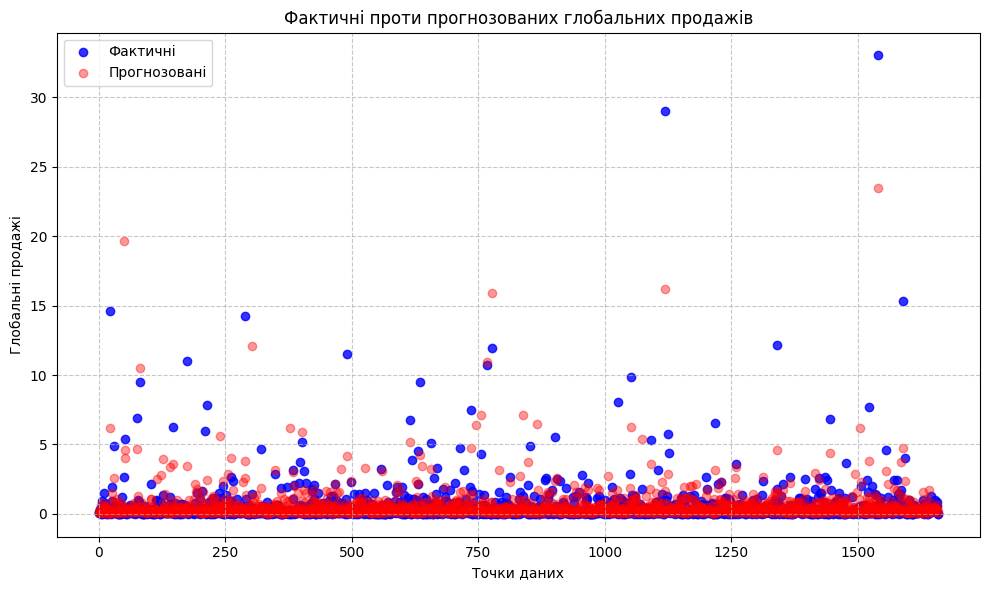

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактичні', alpha=0.8)  # Графік фактичних значень
plt.scatter(range(len(y_test)), y_pred, color='red', label='Прогнозовані', alpha=0.4)  # Графік прогнозованих значень
plt.xlabel('Точки даних')
plt.ylabel('Глобальні продажі')
plt.title('Фактичні проти прогнозованих глобальних продажів')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
sales_columns = ['NA_Sales','EU_Sales', 'JP_Sales','Other_Sales','Rank']
features = [col for col in df_filtered.columns if col not in sales_columns]
target = 'EU_Sales'

X = df_filtered[features]
y = df_filtered[target]

label_encoder = LabelEncoder()
X_encoded = X.copy()
for feature in features:
    X_encoded[feature] = label_encoder.fit_transform(X[feature])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=1000)
model = RandomForestRegressor(n_estimators=200, random_state=30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.938485273852155


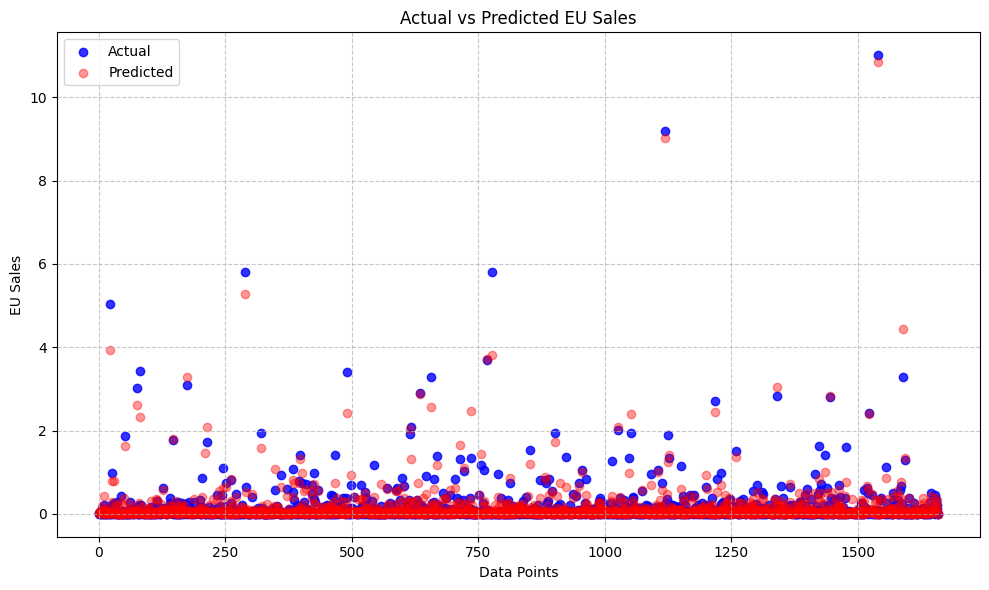

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.8)
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted', alpha=0.4)
plt.xlabel('Data Points')
plt.ylabel('EU Sales')
plt.title('Actual vs Predicted EU Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


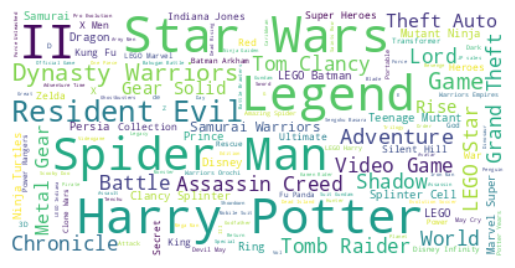

In [ ]:
genre_data = vgs[vgs['Genre'] == 'Action']
text = ' '.join(genre_data['Name'])

wc = WordCloud(background_color="white", max_words=2000, stopwords=stopwords,
               max_font_size=40, random_state=42)
wc.generate(text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
#importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
#print(importance)